In [42]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [43]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

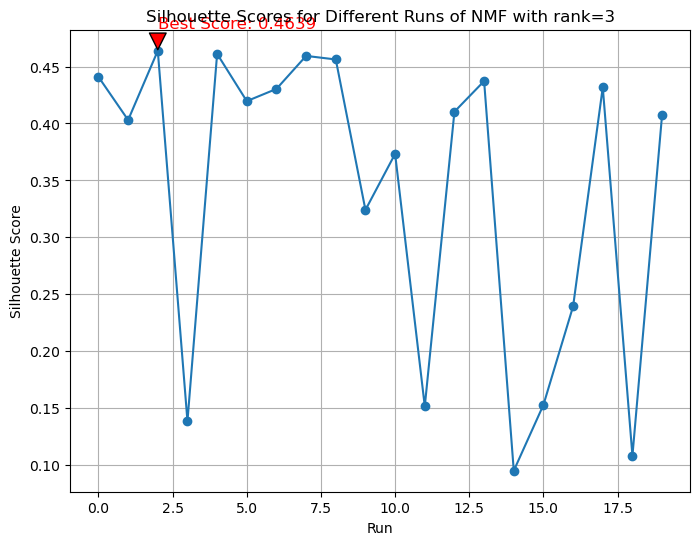

Best Silhouette Score: 0.4639


Lengths match.

Cluster          0   1   2
grain_variety             
Canadian wheat   0  67   3
Kama wheat      23  42   5
Rosa wheat      43   0  27


c:\Users\12737\Desktop\STUDY\Sophomore\DIP\exp 4\.conda\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 1500 reached. Increase it to improve convergence.
  warnings.warn(


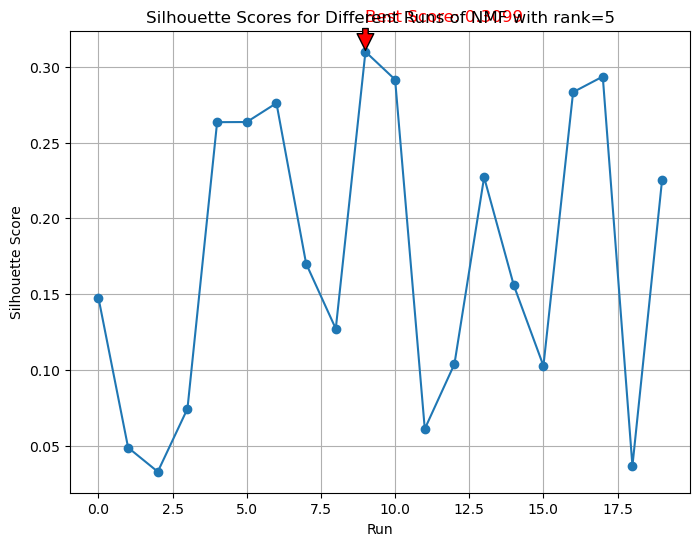

Best Silhouette Score: 0.3099


Lengths match.

Cluster          0   1   2   3   4
grain_variety                     
Canadian wheat   0  63   3   4   0
Kama wheat       1   4  40  24   1
Rosa wheat      22   0   8   8  32


c:\Users\12737\Desktop\STUDY\Sophomore\DIP\exp 4\.conda\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 1500 reached. Increase it to improve convergence.
  warnings.warn(


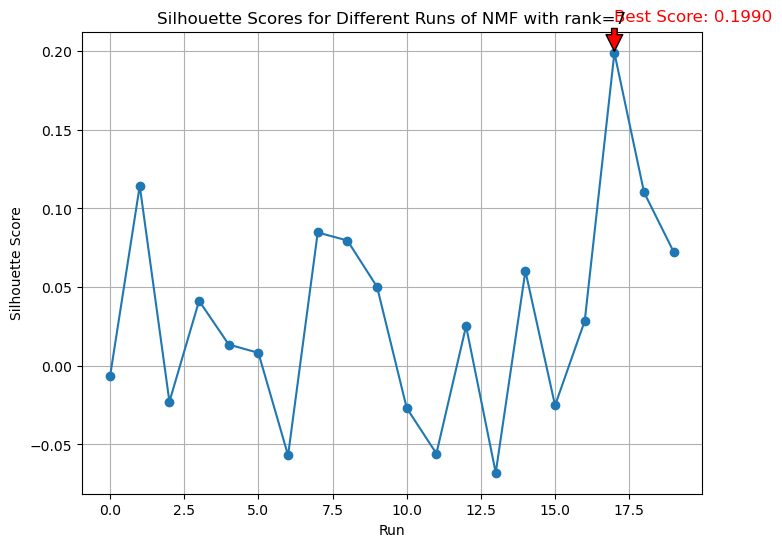

Best Silhouette Score: 0.1990


Lengths match.

Cluster          0   1  2   3   4   5   6
grain_variety                            
Canadian wheat   0  39  5   0   3  18   5
Kama wheat       0   5  3   0  21   9  32
Rosa wheat      36   0  7  18   9   0   0


In [44]:
# Load the dataset
df = pd.read_csv('seeds.csv')

# Display the first few rows of the dataframe
df.head()

# 使用map函数对varieties列进行重新标记
features = df.iloc[:, :-1].values

# Display the first few rows of the feature data
features[:5]
# Parameters
rank_list = [3,5,7]
repeat_times = 20

# Storage for results
silhouette_scores = []
clustering_results = []

for rank in rank_list:
    silhouette_scores = []
    clustering_results = []
    for _ in range(repeat_times):
        # Perform NMF
        model = NMF(n_components=rank, max_iter=1500,init='random', random_state=None)
        W = model.fit_transform(features)
        H = model.components_

        # Perform KMeans clustering on the NMF-transformed data
        kmeans = KMeans(n_clusters=rank, random_state=None)
        clusters = kmeans.fit_predict(W)
        
        # Calculate Silhouette score
        score = silhouette_score(features, clusters)
        silhouette_scores.append(score)
        clustering_results.append(clusters)

    # Plot the Silhouette scores
    plt.figure(figsize=(8, 6))
    plt.plot(range(repeat_times), silhouette_scores, marker='o')
    plt.xlabel('Run')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Scores for Different Runs of NMF with rank={rank}')
    plt.grid(True)

    # Highlight the best score
    best_run = np.argmax(silhouette_scores)
    best_score = silhouette_scores[best_run]
    plt.annotate(f'Best Score: {best_score:.4f}', xy=(best_run, best_score), 
                xytext=(best_run, best_score + 0.02),
                arrowprops=dict(facecolor='red', shrink=0.05),
                fontsize=12, color='red')

    plt.show()


    # Find the best silhouette score and corresponding labels
    best_index = np.argmax(silhouette_scores)
    best_score = silhouette_scores[best_index]

    # Perform NMF and clustering again for the best score
    nmf = NMF(n_components=rank,max_iter=1500, init='random', random_state=None)
    W = nmf.fit_transform(features)
    H = nmf.components_

    kmeans = KMeans(n_clusters=rank, random_state=0).fit(W)
    best_labels = kmeans.labels_

    # Print the best silhouette score
    print(f'Best Silhouette Score: {best_score:.4f}\n')
    best_labels_df = pd.DataFrame(best_labels, columns=['Cluster'])
    if len(df.iloc[:, -1]) == best_labels.shape[0]:
        print("\nLengths match.\n")
    else:
        print("\nLengths do NOT match.\n")
    # Create crosstab and check the result
    crosstab = pd.crosstab(df.iloc[:, -1], best_labels_df['Cluster'])
    print(crosstab)

In [45]:
# Check if best_labels have data
print(f"best_labels shape: {best_labels.shape}")
print(f"best_labels: {best_labels}")
print(f"grain variety shape: {df.iloc[:, -1]}")
# Ensure length of best_labels and varieties are the same
if len(df.iloc[:, -1]) == best_labels.shape[0]:
    print("\nLengths match.")
else:
    print("\nLengths do NOT match.")

# Create DataFrame and check the name of columns
best_labels_df = pd.DataFrame(best_labels, columns=['Cluster'])

# Check column name and data of DataFrame 
print(f"\n{best_labels_df.head()}\n")
print(f"\n{df.iloc[:, -1]}\n")

best_labels shape: (210,)
best_labels: [6 6 6 6 6 5 4 6 4 4 4 6 4 4 5 4 4 4 6 1 6 6 6 6 6 6 1 5 6 1 6 4 5 6 6 4 4
 4 4 4 6 6 6 2 2 6 6 4 4 5 4 4 2 4 6 6 5 6 4 5 5 6 6 1 6 6 5 6 6 1 0 0 0 3
 0 0 0 3 3 2 0 3 3 0 3 0 0 3 3 3 0 0 0 3 3 2 3 0 0 0 2 0 3 0 2 0 0 0 3 0 0
 0 0 3 3 0 2 0 0 0 3 0 4 0 4 2 3 0 0 2 0 0 4 4 4 4 0 4 4 4 2 2 4 1 1 1 6 1
 1 1 5 1 1 1 1 1 6 5 1 1 1 5 1 5 1 6 1 5 1 1 1 1 5 1 1 1 1 5 5 6 5 5 1 5 4
 5 1 1 2 1 5 1 5 5 1 1 5 4 1 5 1 6 1 2 1 5 1 2 1 1]
grain variety shape: 0          Kama wheat
1          Kama wheat
2          Kama wheat
3          Kama wheat
4          Kama wheat
            ...      
205    Canadian wheat
206    Canadian wheat
207    Canadian wheat
208    Canadian wheat
209    Canadian wheat
Name: grain_variety, Length: 210, dtype: object

Lengths match.

   Cluster
0        6
1        6
2        6
3        6
4        6


0          Kama wheat
1          Kama wheat
2          Kama wheat
3          Kama wheat
4          Kama wheat
            ...      
205   

In [46]:
# Create crosstab and check the result
crosstab = pd.crosstab(df.iloc[:, -1], best_labels_df['Cluster'])
print(crosstab)

Cluster          0   1  2   3   4   5   6
grain_variety                            
Canadian wheat   0  39  5   0   3  18   5
Kama wheat       0   5  3   0  21   9  32
Rosa wheat      36   0  7  18   9   0   0


In [47]:
del os.environ["OMP_NUM_THREADS"]